In [120]:
import numpy as np
import csv
import glob, copy, os, random, time
import pandas as pd
import matplotlib.pyplot as plt




# 1. CSI DATA PROCESSING


In [121]:
filename = './2023.02.14 - 6 HSY/ESP_1/COM11_2023_02_14_19_43_44.csv' #파일경로 여기에 
# with open(filename, newline='') as csvfile:
#     tmp = np.array([[ float(elm) for elm in v] for v in csv.reader(csvfile, delimiter=',')])

# tmp shape == frame_num x 111 
# CSI amplitude = tmp[:,:51] 
# CSI phase == tmp[:,51:102] 
# CSI label = tmp[:,-8] 

In [122]:
data = pd.read_csv(filename, header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,24.331050,24.331050,22.360680,23.537205,22.803509,21.840330,20.880613,19.924859,18.973666,18.027756,...,-1.494024,9243780.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,14551.0
1,27.459060,26.627054,27.459060,26.076810,24.186773,22.825424,22.360680,23.259407,22.360680,21.470911,...,0.858439,9283767.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,44531.0
2,25.000000,25.298221,23.409400,23.409400,22.472205,20.615528,20.615528,21.023796,20.124612,19.723083,...,0.262995,9312986.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,68516.0
3,28.635642,28.178006,26.832816,26.419690,25.059928,24.186773,23.323808,22.472205,21.633308,20.808652,...,-1.216091,9323736.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,92502.0
4,25.961510,24.738634,24.515301,23.537205,22.561028,21.377558,21.377558,21.095023,20.099751,20.000000,...,-0.273009,9324130.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,105493.0


In [123]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
count,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,...,3074.000000,3.074000e+03,3074.0,3074.0,3074.0,3074.0,3074.0,3074.000000,3074.000000,3074.000000
mean,25.516599,24.844975,23.988354,23.373490,22.353932,21.323201,20.670665,20.284906,19.802747,19.224495,...,0.024373,3.624410e+07,0.0,2023.0,2.0,14.0,19.0,43.716981,28.477554,498751.807092
std,3.443723,3.375534,3.335650,3.314279,3.264135,3.206885,3.172211,3.149774,3.101998,3.047268,...,0.901124,1.585569e+07,0.0,0.0,0.0,0.0,0.0,0.450539,17.601188,294117.703654
min,9.486833,9.000000,8.544004,9.219544,8.544004,8.602325,8.602325,8.485281,9.055385,7.280110,...,-1.570796,9.243780e+06,0.0,2023.0,2.0,14.0,19.0,43.000000,0.000000,3160.000000
25%,23.323808,22.671568,21.931712,21.189620,20.099751,19.104973,18.439089,18.110770,17.804494,17.204651,...,-0.758378,2.230394e+07,0.0,2023.0,2.0,14.0,19.0,43.000000,14.000000,241198.000000
50%,25.709920,25.059928,24.166092,23.600847,22.561028,21.540659,20.880613,20.396078,19.924859,19.235384,...,0.039979,3.649297e+07,0.0,2023.0,2.0,14.0,19.0,44.000000,27.000000,492420.000000
75%,27.784888,27.018512,26.172505,25.495098,24.515301,23.409400,22.803509,22.360680,21.931712,21.189620,...,0.785398,5.005497e+07,0.0,2023.0,2.0,14.0,19.0,44.000000,46.000000,757288.000000
max,51.478151,45.705580,38.832976,37.656341,43.174066,43.829214,44.407207,34.481879,33.615473,39.446166,...,1.570796,6.332281e+07,0.0,2023.0,2.0,14.0,19.0,44.000000,59.000000,996196.000000


In [124]:
column_mean = data.iloc[:, 0].mean()
print(column_mean)


25.516598757172936


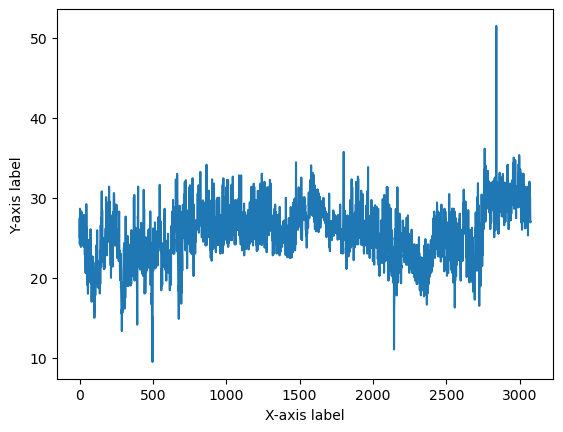

In [125]:

plt.plot(data.iloc[:, 0])
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.show()

## 데이터 분류해서 column 명 지정
- 1~51: amplitude
- 52~102: phase
- 104~ : yyyy, mm ... ms


In [126]:
data_amplitude = data.iloc[:, 0:50]


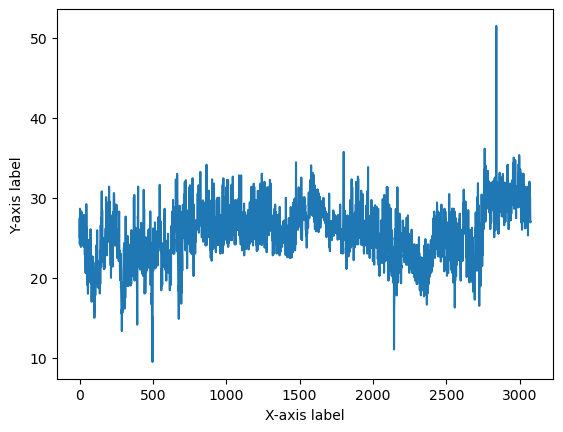

In [127]:
plt.plot(data_amplitude.iloc[:, 0])
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.show()

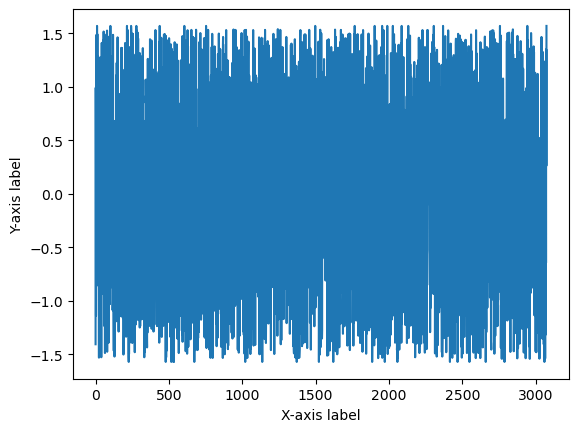

In [128]:
data_phase = data.iloc[:, 51:101]

plt.plot(data_phase.iloc[:, 0])
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.show()

In [129]:
data_others = data.iloc[:,102:]
data_others.head()

,102,103,104,105,106,107,108,109,110
0,9243780.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,14551.0
1,9283767.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,44531.0
2,9312986.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,68516.0
3,9323736.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,92502.0
4,9324130.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,105493.0


In [130]:
columns_amplitude = ['amplitude'+str(i+1) for i in range(51)]
columns_phase = ['phase' + str(i+1) for i in range(51,102)]
columns_103 = ['103']
columns_tag = ['tag']
columns_timestamp = ['YYYY','MM', 'DD', 'hh','mm','ss','ms']

In [131]:
data.columns = columns_amplitude + columns_phase + columns_103+ columns_tag + columns_timestamp


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Columns: 111 entries, amplitude1 to ms
dtypes: float64(111)
memory usage: 2.6 MB


## timestamp 열 추가
yyyy, ... ms 값을 합쳐서 Date 형식의 타임스탬프 값 추가

unmatch 에러가 나면 as.type(int) 를 사용해볼것

In [132]:
# Convert 'YYYY', 'MM', 'DD', 'hh', 'mm', 'ss', and 'ms' columns to a single datetime column
date_components = ['YYYY', 'MM', 'DD']
time_components = ['hh', 'mm', 'ss', 'ms']
data[date_components + time_components] = data[date_components + time_components].astype(int)
data['timestamp'] = pd.to_datetime(data[date_components + time_components].astype(str).apply(' '.join, 1), format='%Y %m %d %H %M %S %f')

data.head()

,amplitude1,amplitude2,amplitude3,amplitude4,amplitude5,amplitude6,amplitude7,amplitude8,amplitude9,amplitude10,...,103,tag,YYYY,MM,DD,hh,mm,ss,ms,timestamp
0,24.331050,24.331050,22.360680,23.537205,22.803509,21.840330,20.880613,19.924859,18.973666,18.027756,...,9243780.0,0.0,2023,2,14,19,43,45,14551,2023-02-14 19:43:45.145510
1,27.459060,26.627054,27.459060,26.076810,24.186773,22.825424,22.360680,23.259407,22.360680,21.470911,...,9283767.0,0.0,2023,2,14,19,43,45,44531,2023-02-14 19:43:45.445310
2,25.000000,25.298221,23.409400,23.409400,22.472205,20.615528,20.615528,21.023796,20.124612,19.723083,...,9312986.0,0.0,2023,2,14,19,43,45,68516,2023-02-14 19:43:45.685160
3,28.635642,28.178006,26.832816,26.419690,25.059928,24.186773,23.323808,22.472205,21.633308,20.808652,...,9323736.0,0.0,2023,2,14,19,43,45,92502,2023-02-14 19:43:45.925020
4,25.961510,24.738634,24.515301,23.537205,22.561028,21.377558,21.377558,21.095023,20.099751,20.000000,...,9324130.0,0.0,2023,2,14,19,43,45,105493,2023-02-14 19:43:45.105493


## CSI DATA RESULT

In [133]:

csi_data = data
csi_data.head()

,amplitude1,amplitude2,amplitude3,amplitude4,amplitude5,amplitude6,amplitude7,amplitude8,amplitude9,amplitude10,...,103,tag,YYYY,MM,DD,hh,mm,ss,ms,timestamp
0,24.331050,24.331050,22.360680,23.537205,22.803509,21.840330,20.880613,19.924859,18.973666,18.027756,...,9243780.0,0.0,2023,2,14,19,43,45,14551,2023-02-14 19:43:45.145510
1,27.459060,26.627054,27.459060,26.076810,24.186773,22.825424,22.360680,23.259407,22.360680,21.470911,...,9283767.0,0.0,2023,2,14,19,43,45,44531,2023-02-14 19:43:45.445310
2,25.000000,25.298221,23.409400,23.409400,22.472205,20.615528,20.615528,21.023796,20.124612,19.723083,...,9312986.0,0.0,2023,2,14,19,43,45,68516,2023-02-14 19:43:45.685160
3,28.635642,28.178006,26.832816,26.419690,25.059928,24.186773,23.323808,22.472205,21.633308,20.808652,...,9323736.0,0.0,2023,2,14,19,43,45,92502,2023-02-14 19:43:45.925020
4,25.961510,24.738634,24.515301,23.537205,22.561028,21.377558,21.377558,21.095023,20.099751,20.000000,...,9324130.0,0.0,2023,2,14,19,43,45,105493,2023-02-14 19:43:45.105493


# 2. VO2 DATA PROCESSING
- convert to dataframe
- translate all 
- add timestamp
- 

In [134]:
vo2_filename = './VO2max-6-HSY.csv' #파일경로 여기에 
vo2_rawdata = pd.read_csv(vo2_filename)
vo2_rawdata.head()

,ID1,Unnamed: 1,Unnamed: 2,테스트 날짜,2023-02-14,Unnamed: 5,대기압 (mmHg),766,Unnamed: 8,t,...,mark Speed,mark Dist.,Phase time,VO2/Kg%Pred,BR,VT/Ti,HRR,PaCO2_e,SV,CO
0,성,KIST 연구,NaN,테스트 시간,오후 8:03:11,NaN,대기 온도 (°C),24,NaN,s,...,m/s,m,hh:mm:ss,%,%,---,bpm,mmHg,mL,L/min
1,이름,.,NaN,# steps,315,NaN,대기 상대 습도 (%),36,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,성별,여성,NaN,Duration,00:14:09,NaN,플로우미터 온도 (°C),34,NaN,00:00:01,...,0,0,00:00:00,25,85.2,0.87,81,35,27.7,3
3,나이,32,NaN,BSA (m2),1.87359942400869,NaN,플로우미터 상대 습도 (%),100,NaN,00:00:04,...,0,0,00:00:03,18,88.7,0.74,84,35,25.7,2.7
4,키 (cm),174,NaN,BMI (kg/m2),24.1,NaN,STPD (---),0.8331,NaN,00:00:07,...,0,0,00:00:06,16,89.6,0.7,85,34,25,2.6


## 데이터 분류
meta data 와 vo2 데이터 2개의 dataframes 생성할 것
- 맘대로 저장되어있는 걸 세로로 잘라서 가져와서 트랜스폼하고 하나로 합침
- 한글 -> 영어 변환

In [135]:
vo2_data = vo2_rawdata.iloc[2:,9:]
vo2_data =vo2_data.reset_index()

vo2_data = vo2_data.iloc[:,1:]
vo2_data_meta1 = vo2_rawdata.iloc[:7, :2]
# print(vo2_data_meta1)

vo2_data_meta1 = vo2_data_meta1.set_index('ID1').T.reset_index(drop=True)


In [136]:
vo2_rawdata_noheader = pd.read_csv(vo2_filename, header=None)
vo2_data_meta2 = vo2_rawdata_noheader.iloc[:6, 3:5]

vo2_data_meta2 = vo2_data_meta2.set_index(3).T.reset_index(drop=True)

In [137]:
vo2_data_meta3 = vo2_rawdata_noheader.iloc[:11, 6:8]

vo2_data_meta3 = vo2_data_meta3.set_index(6).T.reset_index(drop=True)

In [138]:
vo2_data_meta = pd.concat([vo2_data_meta1, vo2_data_meta2, vo2_data_meta3], axis=1)


# vo2_data_meta.head()
columns_kor = vo2_data_meta.columns.tolist()
# print(column_names)
columns_names = {'성': 'last_name',
                '이름': 'first_name',
                '성별': 'sex',
                '나이': 'age',
                '키 (cm)': 'height',
                '체중 (kg)': 'weight',
                '생년월일': 'date_of_birth',
                '테스트 날짜': 'test_date',
                '테스트 시간': 'test_time',
                '# steps': 'num_steps',
                'Duration': 'duration',
                'BSA (m2)': 'bsa',
                'BMI (kg/m2)': 'bmi',
                '대기압 (mmHg)': 'atmospheric_pressure',
                '대기 온도 (°C)': 'atmospheric_temperature',
                '대기 상대 습도 (%)': 'atmospheric_humidity',
                '플로우미터 온도 (°C)': 'flowmeter_temperature',
                '플로우미터 상대 습도 (%)': 'flowmeter_humidity',
                'STPD (---)': 'STPD',
                'BTPS Ins (---)': 'BTPS_Ins',
                'BTPS Exp (---)': 'BTPS_Exp',
                'User 1 (---)': 'user1',
                'User 2 (---)': 'user2',
                'User 3 (---)': 'user3'}

columns_eng = [columns_names[col] for col in columns_kor]
vo2_data_meta = vo2_data_meta.rename(columns=columns_names)

vo2_data_meta['sex'] = vo2_data_meta['sex'].replace({'여성': 'Female', '남성': 'Male'})
vo2_data_meta['test_time'] = vo2_data_meta['test_time'].str.replace('오전', 'AM').str.replace('오후', 'PM')


## Timestamp
시작날짜와 시작시간을 하나의 timestamp_start로 추가.

In [139]:

# Merge the 'test_date' and 'test_time' columns into a new 'timestamp' column
vo2_data_meta['timestamp_start'] = pd.to_datetime(vo2_data_meta['test_date'] + ' ' + vo2_data_meta['test_time'], format='%Y-%m-%d %p %I:%M:%S')

vo2_data_meta.head()


,last_name,first_name,sex,age,height,weight,date_of_birth,test_date,test_time,num_steps,...,atmospheric_humidity,flowmeter_temperature,flowmeter_humidity,STPD,BTPS_Ins,BTPS_Exp,user1,user2,user3,timestamp_start
0,KIST 연구,.,Female,32,174,73,1990-12-24,2023-02-14,PM 8:03:11,315,...,36,34,100,0.8331,1.1003,1.0197,-,-,-,2023-02-14 20:03:11


## FINAL DATAFRAMES
- csi_data: csi
- vo2_data: vo2 data
- vo2_data_meta: vo2 meta data

In [140]:
csi_filename = 'csi processed'
vo2_data_filename = 'vo2 processed'
vo2_data_meta_filename = 'vo2 meta processed'

csi_data.to_csv('./'+ csi_filename +'.csv', index=False)



# 3. 데이터 파악
variance 도 추가함

In [141]:
import matplotlib.dates as mdates

locator= mdates.AutoDateLocator()
formatter = mdates.DateFormatter('%H:%M:%S.%F')

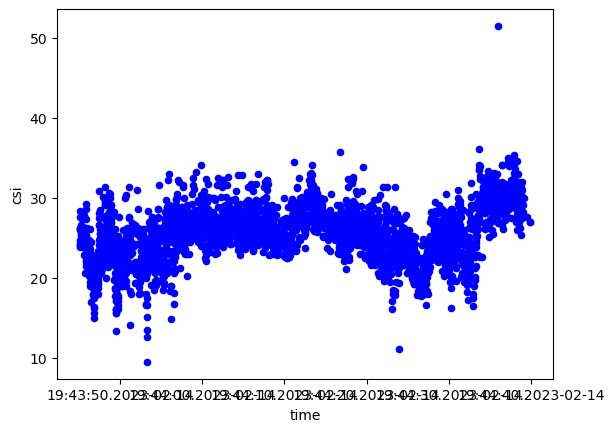

In [142]:
data.plot(kind='scatter', x='timestamp', y='amplitude1', color='blue' )
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)


# plt.xlim(x_min, x_max)
plt.xlabel("time")
plt.ylabel("csi")
plt.show()

In [143]:

x_min = min(data['timestamp'])
x_max = max(data['timestamp'])
print(x_min)

2023-02-14 19:43:45.105493


In [144]:
csi_data.describe()

,amplitude1,amplitude2,amplitude3,amplitude4,amplitude5,amplitude6,amplitude7,amplitude8,amplitude9,amplitude10,...,phase102,103,tag,YYYY,MM,DD,hh,mm,ss,ms
count,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,...,3074.000000,3.074000e+03,3074.0,3074.0,3074.0,3074.0,3074.0,3074.000000,3074.000000,3074.000000
mean,25.516599,24.844975,23.988354,23.373490,22.353932,21.323201,20.670665,20.284906,19.802747,19.224495,...,0.024373,3.624410e+07,0.0,2023.0,2.0,14.0,19.0,43.716981,28.477554,498751.807092
std,3.443723,3.375534,3.335650,3.314279,3.264135,3.206885,3.172211,3.149774,3.101998,3.047268,...,0.901124,1.585569e+07,0.0,0.0,0.0,0.0,0.0,0.450539,17.601188,294117.703654
min,9.486833,9.000000,8.544004,9.219544,8.544004,8.602325,8.602325,8.485281,9.055385,7.280110,...,-1.570796,9.243780e+06,0.0,2023.0,2.0,14.0,19.0,43.000000,0.000000,3160.000000
25%,23.323808,22.671568,21.931712,21.189620,20.099751,19.104973,18.439089,18.110770,17.804494,17.204651,...,-0.758378,2.230394e+07,0.0,2023.0,2.0,14.0,19.0,43.000000,14.000000,241198.000000
50%,25.709920,25.059928,24.166092,23.600847,22.561028,21.540659,20.880613,20.396078,19.924859,19.235384,...,0.039979,3.649297e+07,0.0,2023.0,2.0,14.0,19.0,44.000000,27.000000,492420.000000
75%,27.784888,27.018512,26.172505,25.495098,24.515301,23.409400,22.803509,22.360680,21.931712,21.189620,...,0.785398,5.005497e+07,0.0,2023.0,2.0,14.0,19.0,44.000000,46.000000,757288.000000
max,51.478151,45.705580,38.832976,37.656341,43.174066,43.829214,44.407207,34.481879,33.615473,39.446166,...,1.570796,6.332281e+07,0.0,2023.0,2.0,14.0,19.0,44.000000,59.000000,996196.000000


## variance
51개의 amplidute 값으로 variance를 구해서 추가

In [145]:
# Select only the columns that contain amplitude data
amplitude_cols = [col for col in csi_data.columns if 'amplitude' in col]
data_amplitude = csi_data[amplitude_cols]
variances = data_amplitude.var(axis=1)
csi_data['variance'] = variances

csi_data.head()

,amplitude1,amplitude2,amplitude3,amplitude4,amplitude5,amplitude6,amplitude7,amplitude8,amplitude9,amplitude10,...,tag,YYYY,MM,DD,hh,mm,ss,ms,timestamp,variance
0,24.331050,24.331050,22.360680,23.537205,22.803509,21.840330,20.880613,19.924859,18.973666,18.027756,...,0.0,2023,2,14,19,43,45,14551,2023-02-14 19:43:45.145510,19.766340
1,27.459060,26.627054,27.459060,26.076810,24.186773,22.825424,22.360680,23.259407,22.360680,21.470911,...,0.0,2023,2,14,19,43,45,44531,2023-02-14 19:43:45.445310,23.428236
2,25.000000,25.298221,23.409400,23.409400,22.472205,20.615528,20.615528,21.023796,20.124612,19.723083,...,0.0,2023,2,14,19,43,45,68516,2023-02-14 19:43:45.685160,18.067612
3,28.635642,28.178006,26.832816,26.419690,25.059928,24.186773,23.323808,22.472205,21.633308,20.808652,...,0.0,2023,2,14,19,43,45,92502,2023-02-14 19:43:45.925020,26.551235
4,25.961510,24.738634,24.515301,23.537205,22.561028,21.377558,21.377558,21.095023,20.099751,20.000000,...,0.0,2023,2,14,19,43,45,105493,2023-02-14 19:43:45.105493,19.078510


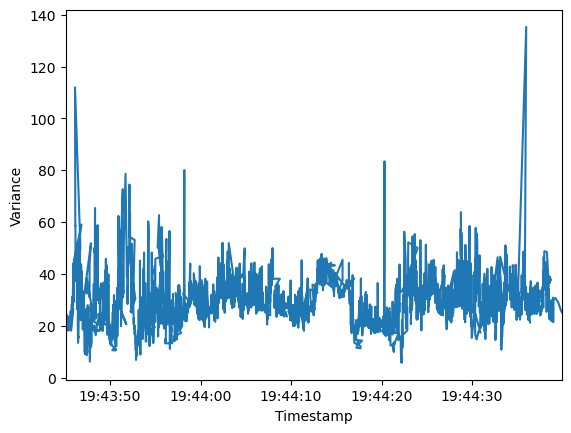

In [146]:
plt.plot(csi_data['timestamp'], csi_data['variance'])
plt.xlabel('Timestamp')
plt.ylabel('Variance')
plt.xlim(csi_data['timestamp'].min(), csi_data['timestamp'].max())
plt.show()